In [8]:
from db import db_path
import _sqlite3
print(db_path)

/home/jakub/DataNinja/data/database/


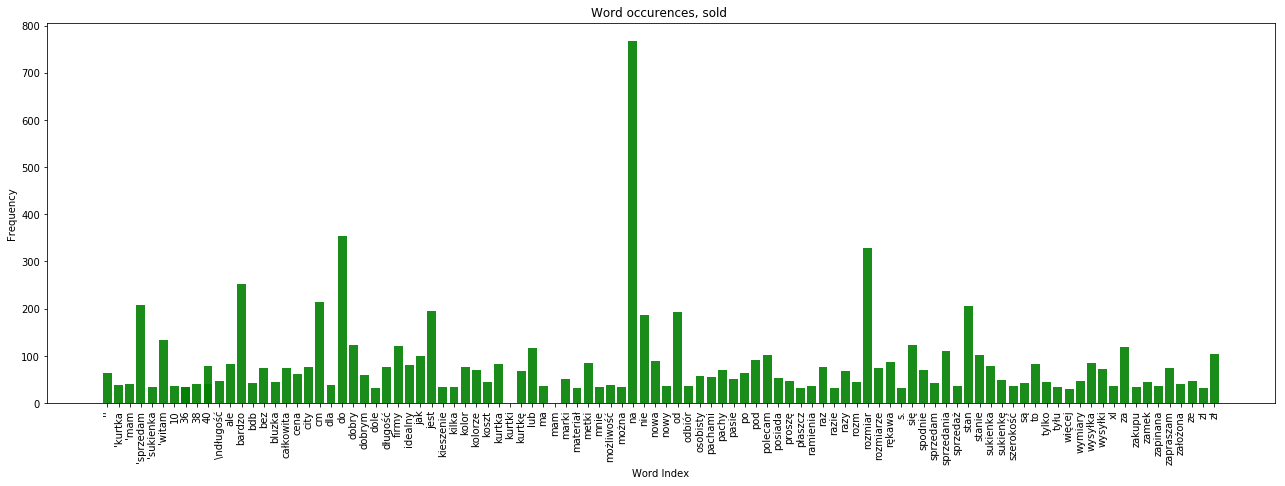

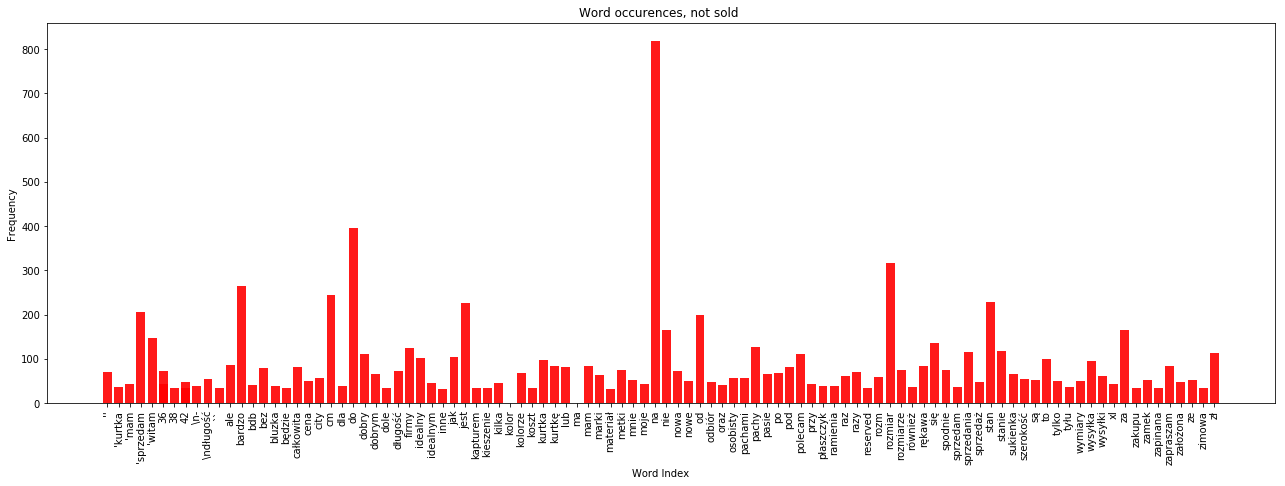

In [1]:
%matplotlib inline

from sandbox import test
from collections import Counter
import operator
import numpy as np
import matplotlib.pyplot as plt



command = """WITH RECURSIVE cte (
    category_id,
    name,
    parent_id
)
AS (
    SELECT category_id,
           name,
           parent_id
      FROM categories
     WHERE name = 'Ubrania'
    UNION ALL
    SELECT p.category_id,
           p.name,
           p.parent_id
      FROM categories p
           INNER JOIN
           cte ON p.parent_id = cte.category_id
)
SELECT 
       full_description
  FROM ads
 WHERE category_id IN (
           SELECT category_id
             FROM cte

       ) and predict_sold is 0 LIMIT 1000"""

command2 = """WITH RECURSIVE cte (
    category_id,
    name,
    parent_id
)
AS (
    SELECT category_id,
           name,
           parent_id
      FROM categories
     WHERE name = 'Ubrania'
    UNION ALL
    SELECT p.category_id,
           p.name,
           p.parent_id
      FROM categories p
           INNER JOIN
           cte ON p.parent_id = cte.category_id
)
SELECT 
       full_description
  FROM ads
 WHERE category_id IN (
           SELECT category_id
             FROM cte

       ) and predict_sold is 1 LIMIT 1000"""


word_freq = test.words_counter(command)
word_freq = dict(Counter(word_freq).most_common(100))
lists = sorted(word_freq.items(), key=lambda x:-x[1])
x,y = zip(*lists)

# sort word occurences in descending order
ind_sort = np.argsort(y)[::-1]

# rearange the data
labels = np.array(x)[ind_sort]
values = np.array(y)[ind_sort]

indexes = np.arange(len(labels))

plt.figure(figsize=(22,7))
mybar = plt.bar(labels, values, color='green', alpha=0.9)
plt.xticks(rotation=90)
plt.xlabel('Word Index')
plt.ylabel('Frequency')
plt.title('Word occurences, sold ')
plt.legend()

word_freq = test.words_counter(command2)
word_freq = dict(Counter(word_freq).most_common(100))
lists = sorted(word_freq.items())
x,y = zip(*lists)




plt.figure(figsize=(22,7))
mybar = plt.bar(x, y, color='red', alpha=0.9)
plt.xticks(rotation=90)
plt.xlabel('Word Index')
plt.ylabel('Frequency')
plt.title('Word occurences, not sold ')
plt.legend()


In [ ]:
!pip install ipywid